# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from seaborn import load_dataset

In [4]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips['id']=tips.index
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,id
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,2
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,4


<Axes: xlabel='net_bill', ylabel='tip_pct'>

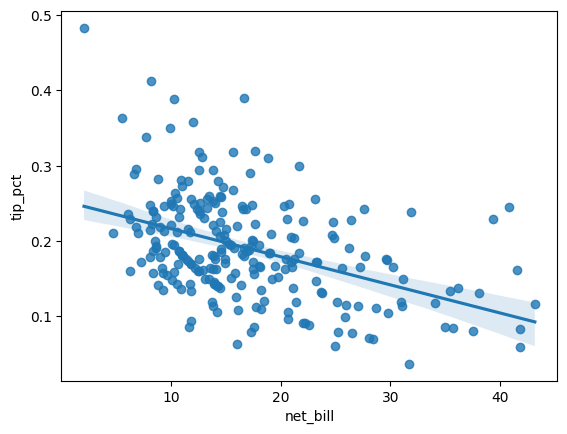

In [16]:
#removi o tip que era outlier absurdo pra poder verificar graficos melhores
tips = tips[tips['tip_pct'] < 0.5]
sns.regplot(y='tip_pct', x='net_bill', data=tips)

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

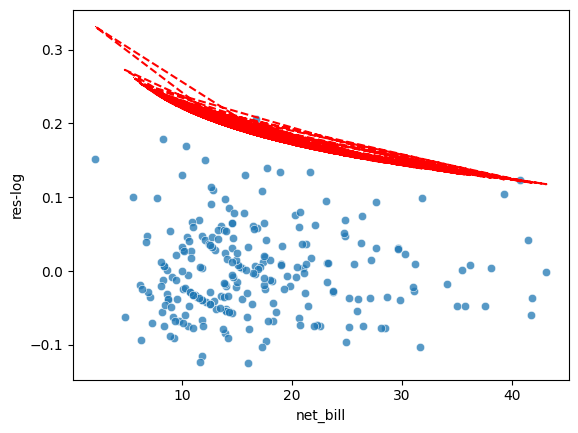

In [20]:
reg_log = smf.ols('tip_pct ~ np.log(net_bill)', data=tips).fit()
tips['res-log']=reg_log.resid
sns.scatterplot(y='res-log', x='net_bill', data=tips, alpha=.75)
plt.plot(tips['net_bill'], reg_log.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

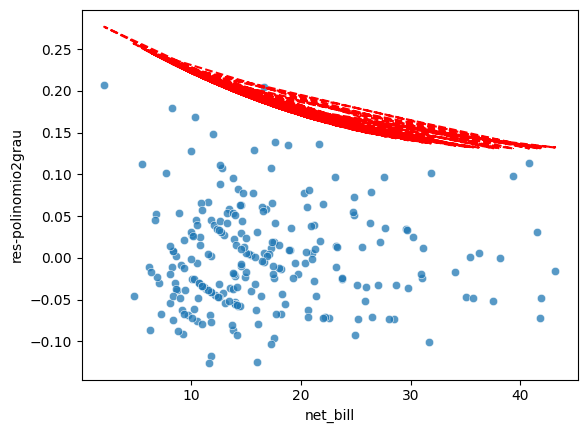

In [19]:
reg_polinomio2grau = smf.ols('tip_pct ~ net_bill + np.power(net_bill, 2)', data=tips).fit()
tips['res-polinomio2grau']=reg_polinomio2grau.resid
sns.scatterplot(y='res-polinomio2grau', x='net_bill', data=tips, alpha=.75)
plt.plot(tips['net_bill'], reg_polinomio2grau.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           5.70e-15
Time:                        19:52:53   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

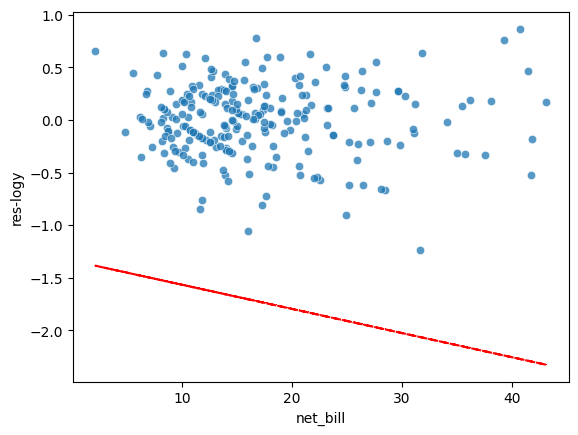

In [24]:
reg_logy = smf.ols('np.log(tip_pct) ~ net_bill', data=tips).fit()
tips['res-logy']=reg_logy.resid
sns.scatterplot(y='res-logy', x='net_bill', data=tips, alpha=.75)
plt.plot(tips['net_bill'], reg_logy.fittedvalues, 'r,--')
print(reg_logy.summary())
#R2 = 0.225

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     69.62
Date:                Fri, 22 Sep 2023   Prob (F-statistic):           5.70e-15
Time:                        19:58:00   Log-Likelihood:                -81.349
No. Observations:                 242   AIC:                             166.7
Df Residuals:                     240   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3383      0.051    -26.095      0.0

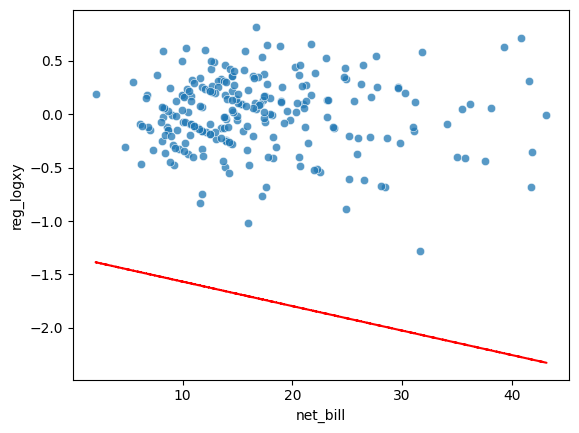

In [28]:
reg_logxy = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
tips['reg_logxy']=reg_logxy.resid
sns.scatterplot(y='reg_logxy', x='net_bill', data=tips, alpha=.75)
plt.plot(tips['net_bill'], reg_logy.fittedvalues, 'r,--')
print(reg_logy.summary())
#R2 = 0.225

###  6. qual modelo resultou no melhor ajuste?

In [ ]:
#deu igual